O código deste notebook é baseado em: https://www.datacamp.com/projects/38

## Configuração

In [2]:
import requests
from bs4 import BeautifulSoup
import nltk

## Extraindo o texto

In [3]:
r = requests.get("https://www.gutenberg.org/files/2701/2701-h/2701-h.htm")

r.encoding = 'utf-8'

html = r.text

print(html[0:2000])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
"http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">
<head>
<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
<meta http-equiv="Content-Style-Type" content="text/css" />
<title>The Project Gutenberg eBook of Moby Dick; Or the Whale, by Herman Melville</title>

<style type="text/css" xml:space="preserve">

    body {margin-left:15%; margin-right:15%; text-align:justify }
    p { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }
    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }
    hr  { width: 50%; text-align: center;}
    blockquote {font-size: 100%; margin-left: 0%; margin-right: 0%;}
    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-serif; font-size: 95%;}
    .toc       { margin-left: 10%; margin-bottom: .75em;}
    pre       

In [4]:
soup = BeautifulSoup(html, 'html.parser')

text = soup.get_text()

print(text[32000:34000])

inging up the rear
      of every funeral I meet; and especially whenever my hypos get such an
      upper hand of me, that it requires a strong moral principle to prevent me
      from deliberately stepping into the street, and methodically knocking
      people’s hats off—then, I account it high time to get to sea as soon
      as I can. This is my substitute for pistol and ball. With a philosophical
      flourish Cato throws himself upon his sword; I quietly take to the ship.
      There is nothing surprising in this. If they but knew it, almost all men
      in their degree, some time or other, cherish very nearly the same feelings
      towards the ocean with me.
    

      There now is your insular city of the Manhattoes, belted round by wharves
      as Indian isles by coral reefs—commerce surrounds it with her surf.
      Right and left, the streets take you waterward. Its extreme downtown is
      the battery, where that noble mole is washed by waves, and cooled by
      bre

## Tokenizando

In [8]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

tokens = tokenizer.tokenize(text)

print(tokens[0:8])

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Moby', 'Dick', 'Or']


<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipykernel_12011/336617543.py:1: SyntaxWarning: invalid escape sequence '\w'
  tokenizer = nltk.tokenize.RegexpTokenizer('\w+')


## Tratamento do texto

In [9]:
words = []

for word in tokens:
    words.append(word.lower())

print(words[0:8])

['the', 'project', 'gutenberg', 'ebook', 'of', 'moby', 'dick', 'or']


In [10]:
from nltk.corpus import stopwords
nltk.download('stopwords')
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lucasqueiros/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
words_ns = [word for word in words if word not in sw]

In [12]:
print(words_ns[0:8])

['project', 'gutenberg', 'ebook', 'moby', 'dick', 'whale', 'herman', 'melville']


## Calculando frequencia das palavras

In [13]:
freqdist = nltk.FreqDist(words_ns)

In [14]:
freqdist

FreqDist({'whale': 1244, 'one': 925, 'like': 647, 'upon': 568, 'man': 527, 'ship': 519, 'ahab': 517, 'ye': 473, 'sea': 455, 'old': 452, ...})

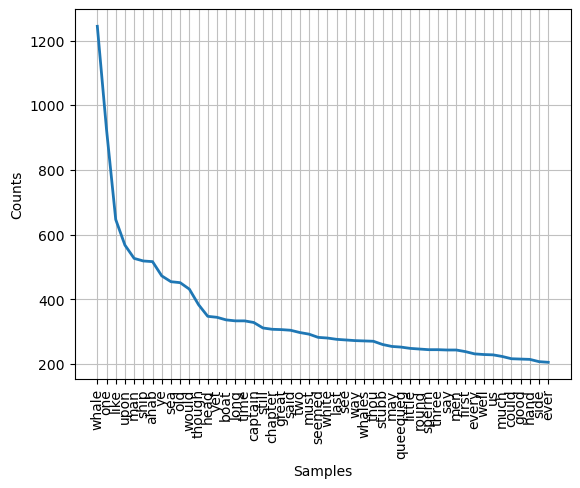

<Axes: xlabel='Samples', ylabel='Counts'>

In [19]:
%matplotlib inline

freqdist.plot(50)

- Podemos observar que a frequencia das palavras no livro moby dick segue a lei de Zipf